<h1> Breast Cancer Detection SVM

<h3> Kernel Linear

Model yang umum digunakan untuk menyelesaikan masalah klasifikasi dan
regresi adalah model linear, yaitu model yang merupakan kombinasi linear
dari fungsi basis:
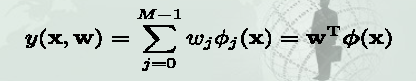

Dimana x = (x1, x2, ..., xD)T adalah variabel input, dan w = (w0, w1, ..., wD)T
adalah parameter, f(x) adalah fungsi basis, 
M adalah jumlah total parameter dari model

• Biasanya, f0(x) = 1, sehingga w0 berfungsi sebagai bias

• Ada banyak pilihan yang mungkin untuk fungsi basis f(x), misal fungsi linear,
fungsi polinomial, fungsi gaussian, fungsi sigmoidal, dll

<h4> Library yang dibutuhkan

In [1]:
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.0
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.23.1


In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

<h4> Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)


<h4> Preprocess Data

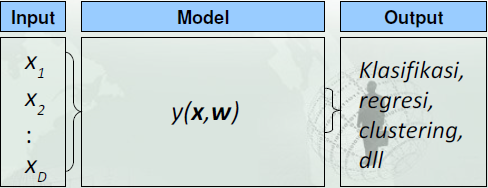

Preprocessing: ekstraksi fitur dan representasi data, misal dalam bentuk vektor xi = (x1, x2, .., xD)T

In [4]:
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [5]:
# Let explore the dataset and do a few visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [6]:
# Describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


<h4> Plot Histogram

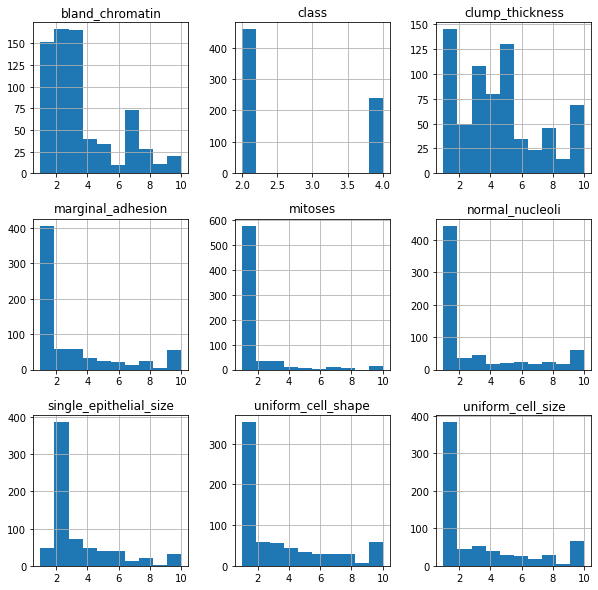

In [7]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

<h4> Scatter Plot

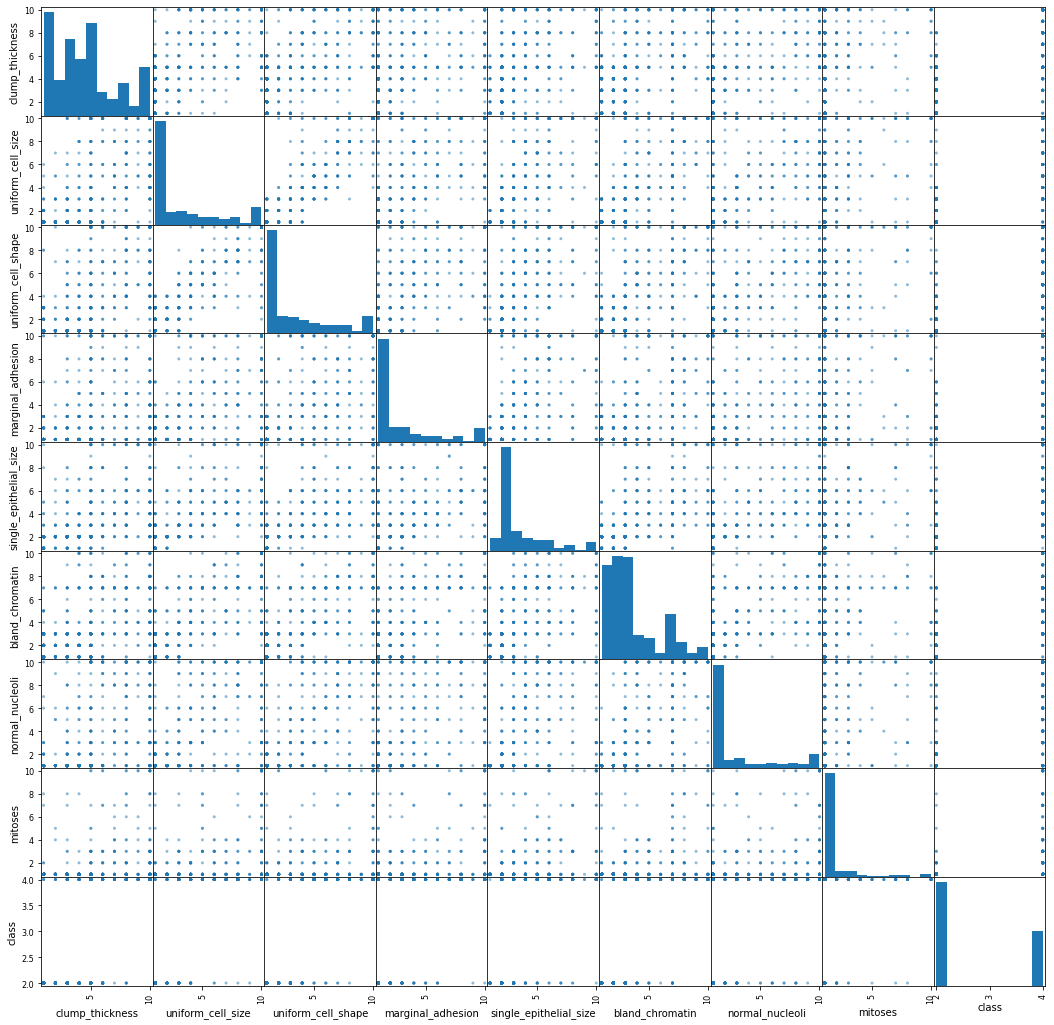

In [8]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

<h4> Training

Pemilihan model dan penentuan parameter model, misal w, berdasarkan data pelatihan (training data)

In [9]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h4> Testing

Pengujian metode dengan data penguji (testing data) yang tidak sama dengan data pelatihan, sehingga didapat nilai estimasi untuk kapabilitas generalisasi dari model.

In [10]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [11]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.966039 (0.023192)
SVM: 0.660325 (0.071649)


In [12]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        89
           4       0.94      1.00      0.97        51

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.6357142857142857
              precision    recall  f1-score   support

           2       0.64      1.00      0.78        89
           4       0.00      0.00      0.00        51

    accuracy                           0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.40      0.64      0.49       140



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.6357142857142857
[2]


Output diatas merupakan hasil prediksi kanker payudara

<h4> Sumber: https://github.com/MuntahaShams/breast-cancer-detection-